# Bike-Sharing Assignment

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1) Which variables are significant in predicting the demand for shared bikes.
2) How well those variables describe the bike demands

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

Reading dataset and understanding data

In [2]:
bike_data_df=pd.read_csv("day.csv")

In [3]:
bike_data_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
bike_data_df.shape

(730, 16)

In [5]:
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_data_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

Checking for the null values

In [7]:
bike_data_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Data Cleaning

Dropping unnecessary columns

In [8]:
bike_data_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Dropping instant,dteday and cnt column as they was not significant for analysis purpose. 
1) Instant is just index hence its insignificant.
2) It can be observed in data that yr,mnth,weekday already present so can drop dteday.
3) cnt column is the sum of casual+registered so dropping casual and registered columns.

In [9]:
bike_data_df.drop(['instant'],axis=1,inplace=True)

In [10]:
bike_data_df.drop(['dteday'],axis=1,inplace=True)

In [11]:
bike_data_df.drop(['casual'],axis=1,inplace=True)

In [12]:
bike_data_df.drop(['registered'],axis=1,inplace=True)

In [13]:
bike_data_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

Renaming few columns for better reading

In [14]:
bike_data_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity','atemp':'feelingtemp','cnt':'count'},inplace=True)

In [15]:
bike_data_df.head()

season  year  month  holiday  weekday  workingday  weathersit       temp  \
0       1     0      1        0        6           0           2  14.110847   
1       1     0      1        0        0           0           2  14.902598   
2       1     0      1        0        1           1           1   8.050924   
3       1     0      1        0        2           1           1   8.200000   
4       1     0      1        0        3           1           1   9.305237   

   feelingtemp  humidity  windspeed  count  
0     18.18125   80.5833  10.749882    985  
1     17.68695   69.6087  16.652113    801  
2      9.47025   43.7273  16.636703   1349  
3     10.60610   59.0435  10.739832   1562  
4     11.46350   43.6957  12.522300   1600

dropping duplicates 

In [16]:
bike_data_df.drop_duplicates(inplace=True)

In [17]:
bike_data_df.shape

(730, 12)

As shape looks same so there are no duplicates

# Outliers Treatment

In [18]:
bike_data_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'feelingtemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [19]:
bike_data_df.nunique()

season           4
year             2
month           12
holiday          2
weekday          7
workingday       2
weathersit       3
temp           498
feelingtemp    689
humidity       594
windspeed      649
count          695
dtype: int64

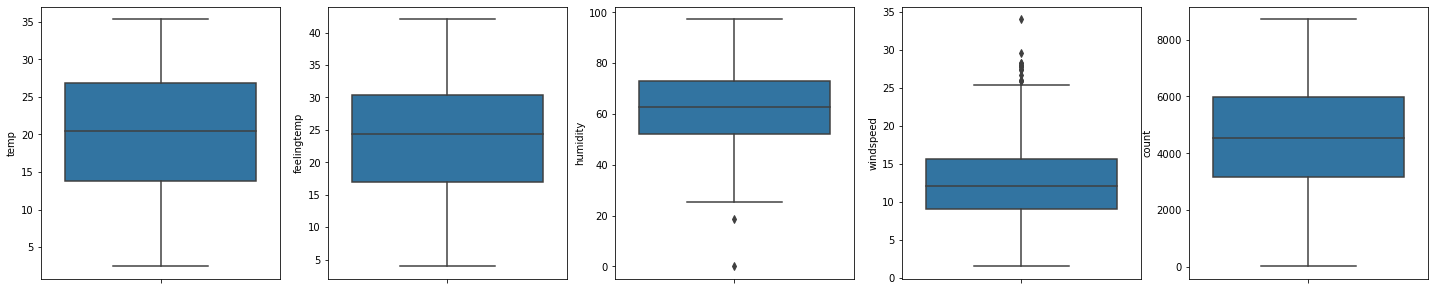

In [20]:
columns=['temp','feelingtemp','humidity','windspeed','count']
plt.figure(figsize=(30,5))

i=1
for col in columns:
    plt.subplot(1,6,i)
    sns.boxplot(y=col,data=bike_data_df)
    i=i+1

As data looks in range so there are no outliers

# Changing numeric column to more meaningful as per data dictionary

In [21]:
bike_data_df.head()

season  year  month  holiday  weekday  workingday  weathersit       temp  \
0       1     0      1        0        6           0           2  14.110847   
1       1     0      1        0        0           0           2  14.902598   
2       1     0      1        0        1           1           1   8.050924   
3       1     0      1        0        2           1           1   8.200000   
4       1     0      1        0        3           1           1   9.305237   

   feelingtemp  humidity  windspeed  count  
0     18.18125   80.5833  10.749882    985  
1     17.68695   69.6087  16.652113    801  
2      9.47025   43.7273  16.636703   1349  
3     10.60610   59.0435  10.739832   1562  
4     11.46350   43.6957  12.522300   1600

In [22]:
bike_data_df.season=bike_data_df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [23]:
bike_data_df.month=bike_data_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [24]:
bike_data_df.weekday=bike_data_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [25]:
bike_data_df.weathersit=bike_data_df.weathersit.map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})

In [26]:
bike_data_df.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0      misty  14.110847   
1  spring     0   jan        0     sun           0      misty  14.902598   
2  spring     0   jan        0     mon           1      clear   8.050924   
3  spring     0   jan        0     tue           1      clear   8.200000   
4  spring     0   jan        0     wed           1      clear   9.305237   

   feelingtemp  humidity  windspeed  count  
0     18.18125   80.5833  10.749882    985  
1     17.68695   69.6087  16.652113    801  
2      9.47025   43.7273  16.636703   1349  
3     10.60610   59.0435  10.739832   1562  
4     11.46350   43.6957  12.522300   1600

# Data Visualization 

Using pairplots to check the linear relationships among features.

In [27]:
bike_data_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'feelingtemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

<Figure size 1080x2160 with 0 Axes>

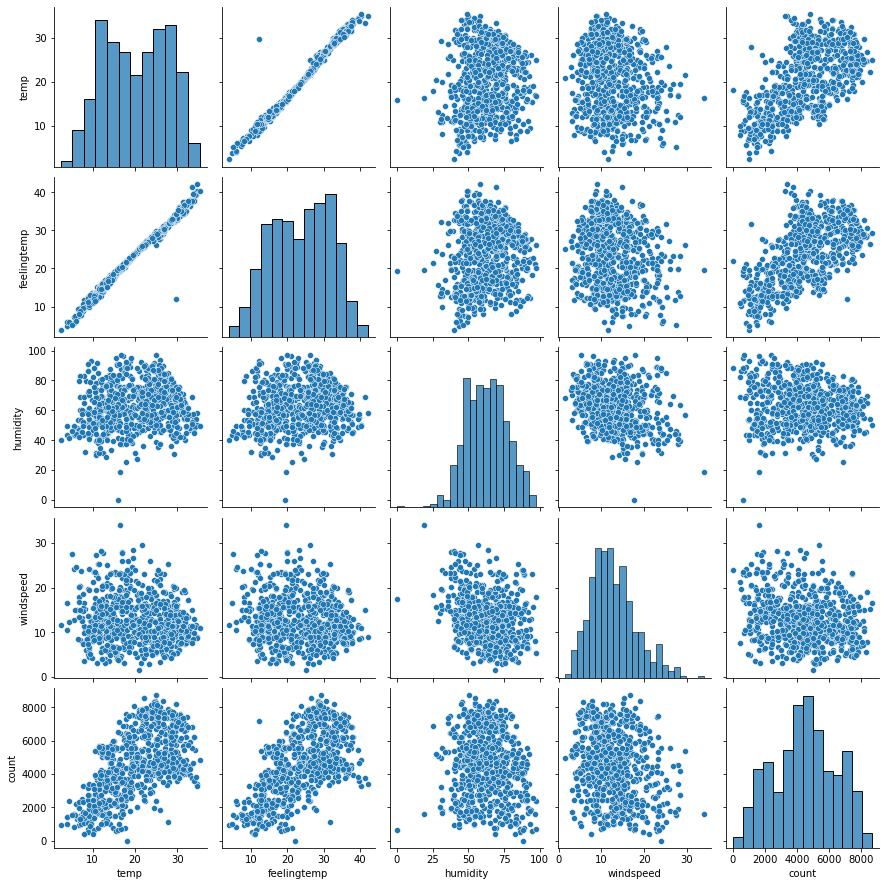

In [28]:
plt.figure(figsize=(15,30))
sns.pairplot(data=bike_data_df,vars=['temp','feelingtemp','humidity','windspeed','count'])
plt.show()

Form the above graphs we can observe that their is strong linear relationship between the temperature and feeling temperature and they are correlated.

Heapmap for correlation between the numerical variables

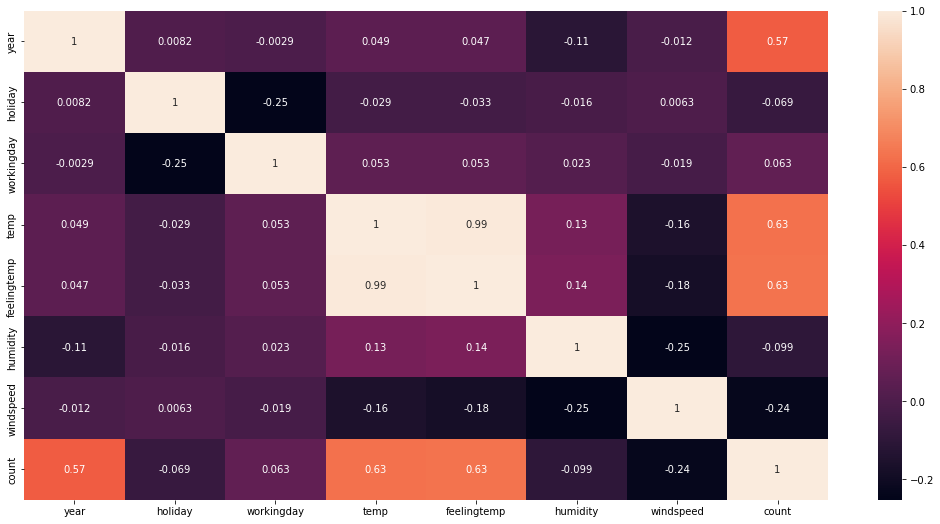

In [29]:
plt.figure(figsize=(18,9))
sns.heatmap(bike_data_df.corr(),annot=True)
plt.show()

<Figure size 720x360 with 0 Axes>

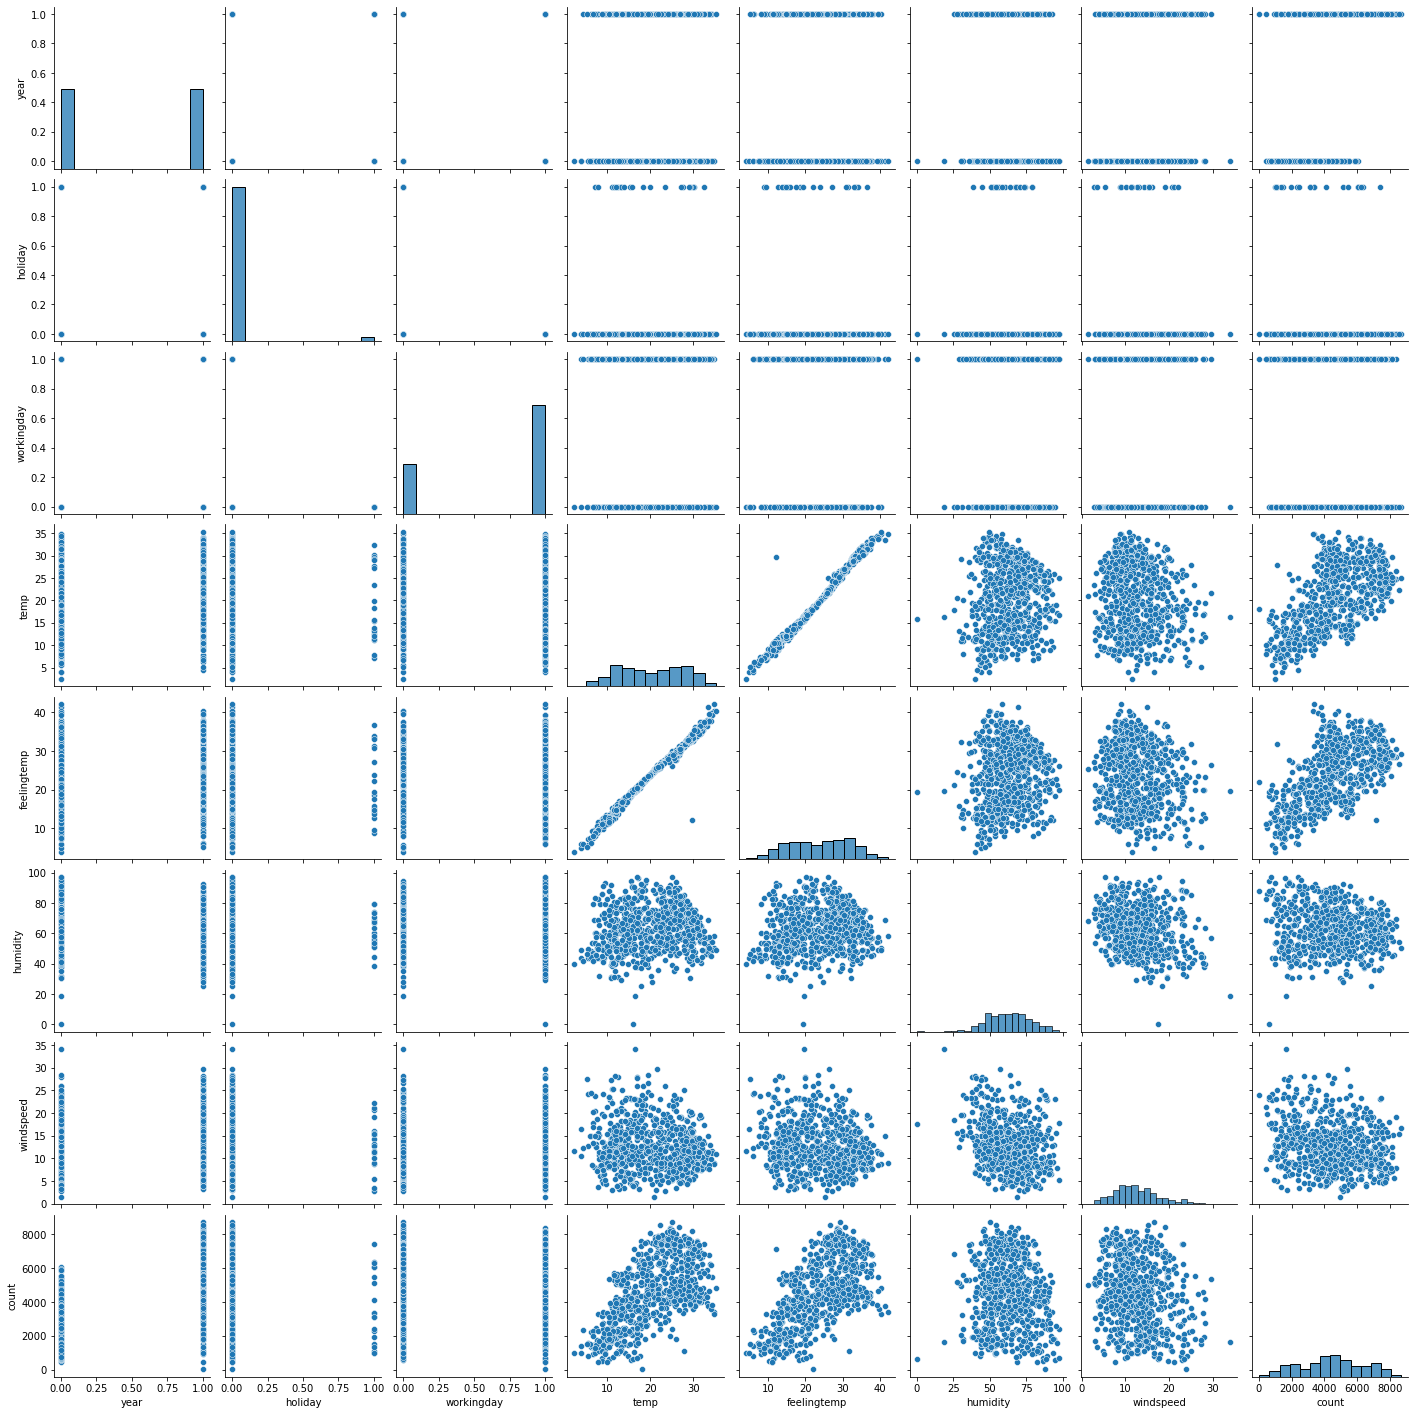

In [30]:
plt.figure(figsize=(10,5))
sns.pairplot(bike_data_df)
plt.show()

Correlation between numerical features

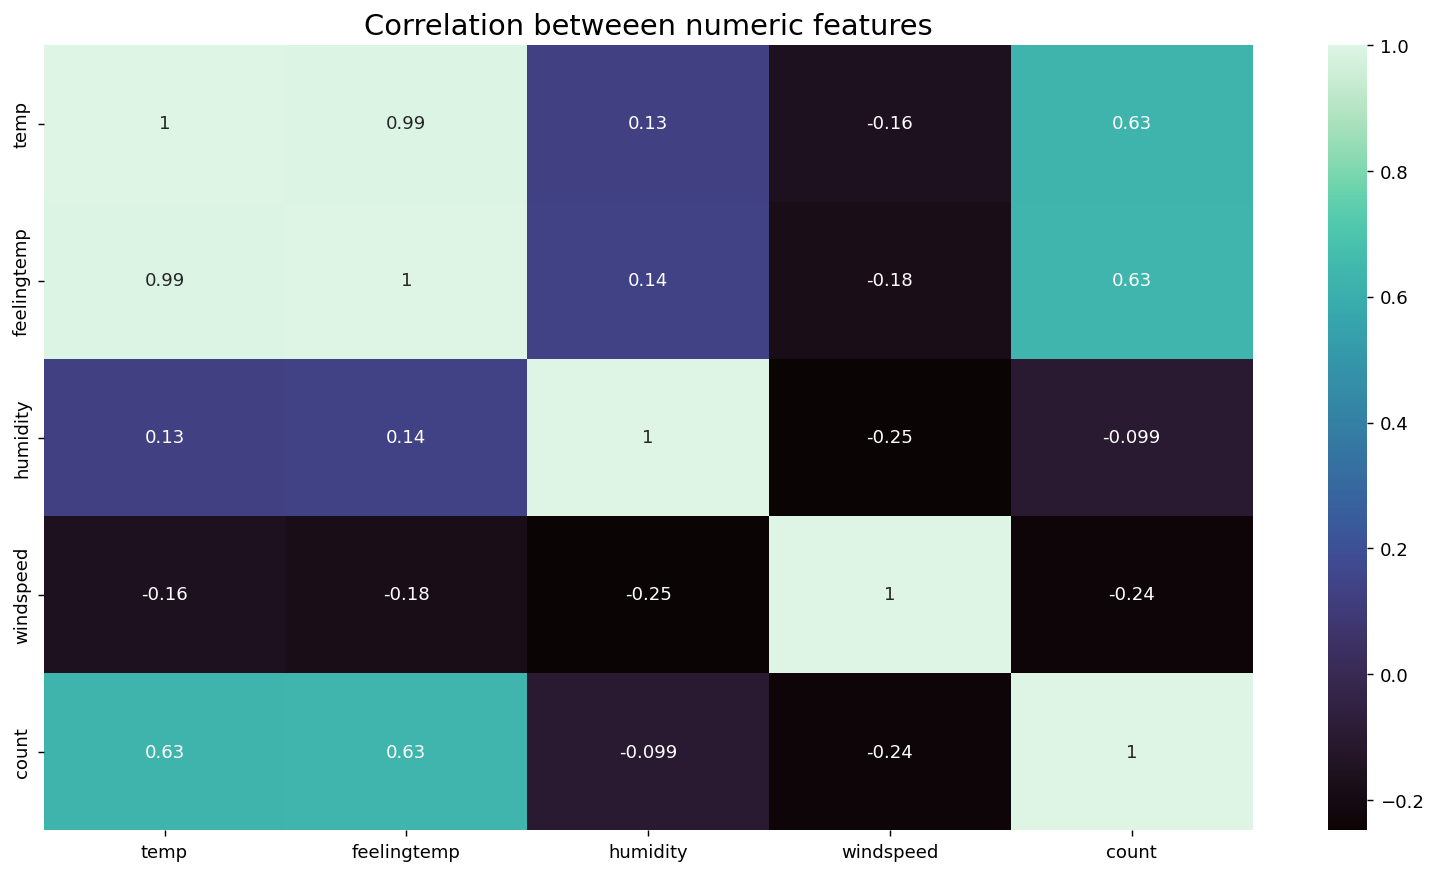

In [31]:
num_features = ["temp","feelingtemp","humidity","windspeed","count"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(bike_data_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

visualising the categorical variables

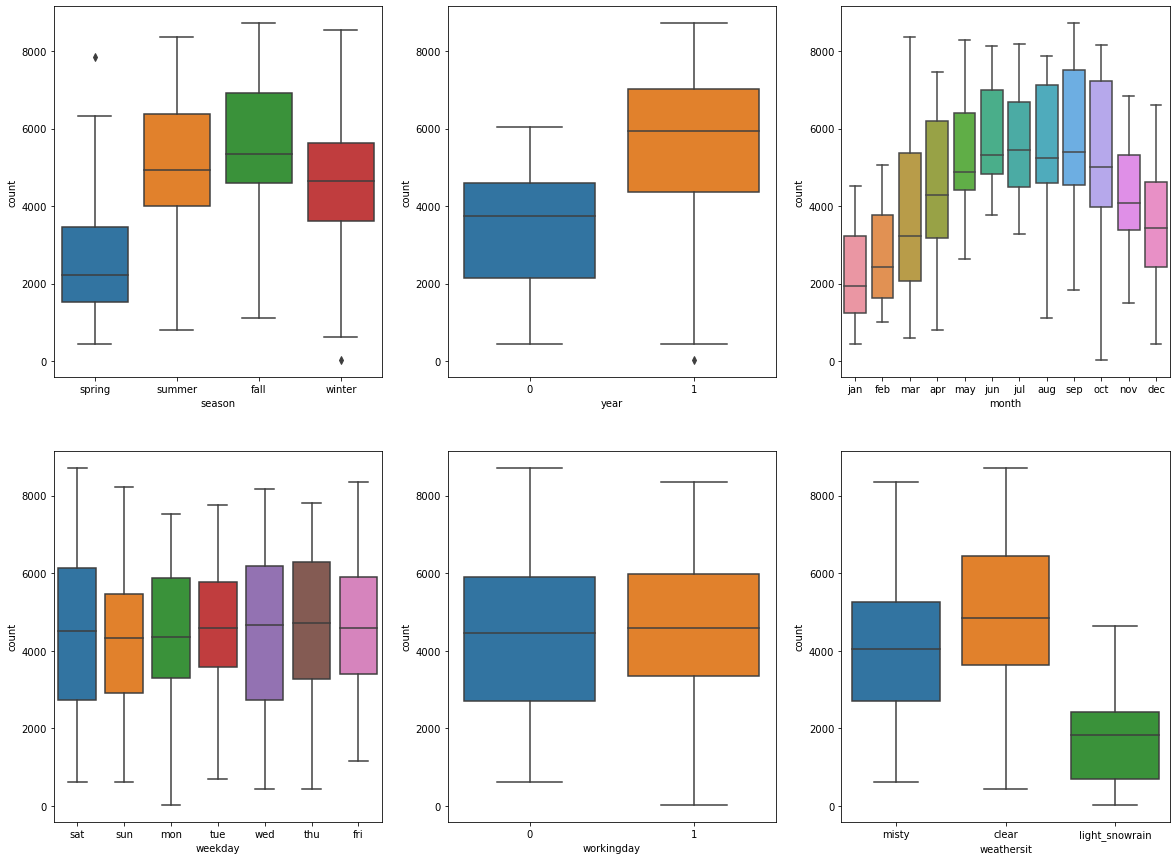

In [32]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='count',data=bike_data_df)

plt.subplot(2,3,2)
sns.boxplot(x='year',y='count',data=bike_data_df)

plt.subplot(2,3,3)
sns.boxplot(x='month',y='count',data=bike_data_df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='count',data=bike_data_df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='count',data=bike_data_df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='count',data=bike_data_df)

plt.show()

Form the above graphs we can observe that their is strong linear relationship between the temperature and feeling temperature and they are correlated.

Visualizing categorical columns

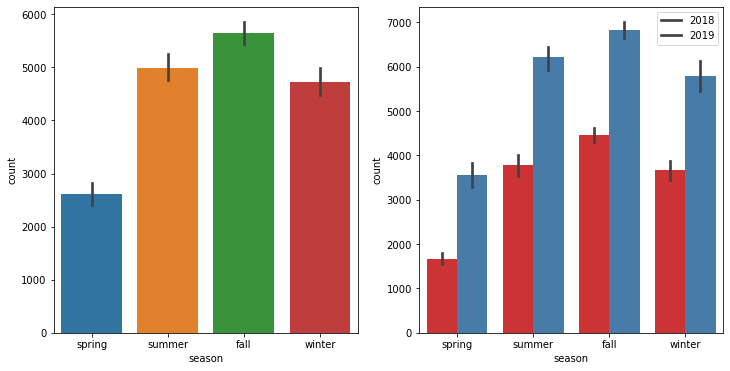

In [33]:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(bike_data_df['season'],'count',data=bike_data_df)
    plt.subplot(1,2,2)
    sns.barplot(bike_data_df['season'],'count',data=bike_data_df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

Inference- Fall season has more bookings comparatively and booking has increased in 2019 

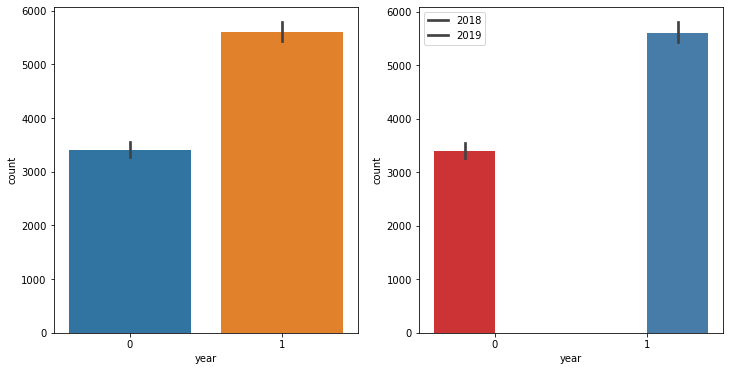

In [34]:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(bike_data_df['year'],'count',data=bike_data_df)
    plt.subplot(1,2,2)
    sns.barplot(bike_data_df['year'],'count',data=bike_data_df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

Inference- Bookings are more in 2019 compared to 2018.

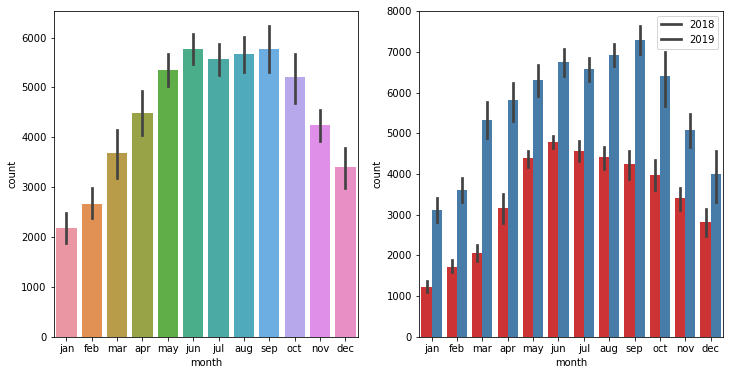

In [35]:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(bike_data_df['month'],'count',data=bike_data_df)
    plt.subplot(1,2,2)
    sns.barplot(bike_data_df['month'],'count',data=bike_data_df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

Inference- Highest bookings are done in the months jun and sep. Also number of bookings seem to be less in the start of year and then increases till mid and then the trend is downward till end of year. 

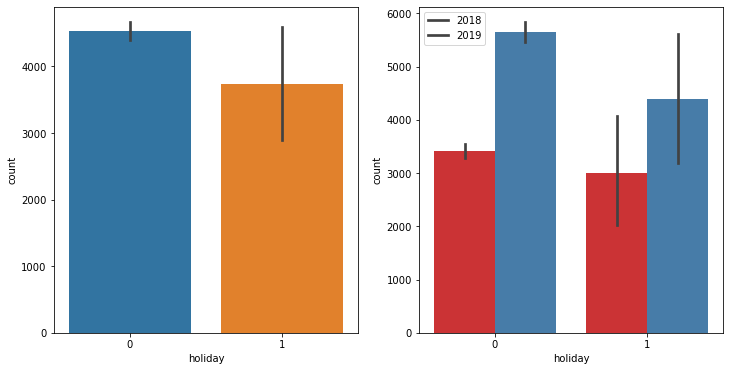

In [36]:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(bike_data_df['holiday'],'count',data=bike_data_df)
    plt.subplot(1,2,2)
    sns.barplot(bike_data_df['holiday'],'count',data=bike_data_df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

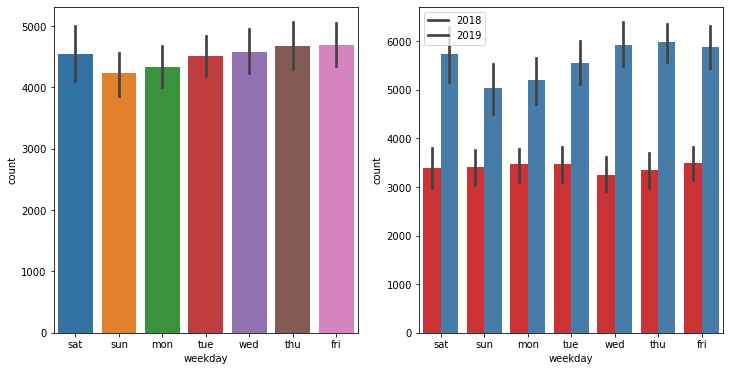

In [37]:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(bike_data_df['weekday'],'count',data=bike_data_df)
    plt.subplot(1,2,2)
    sns.barplot(bike_data_df['weekday'],'count',data=bike_data_df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

Inference- Sundays seem to have lowest booking as compared to other days and sat,thu and fri have high booking.

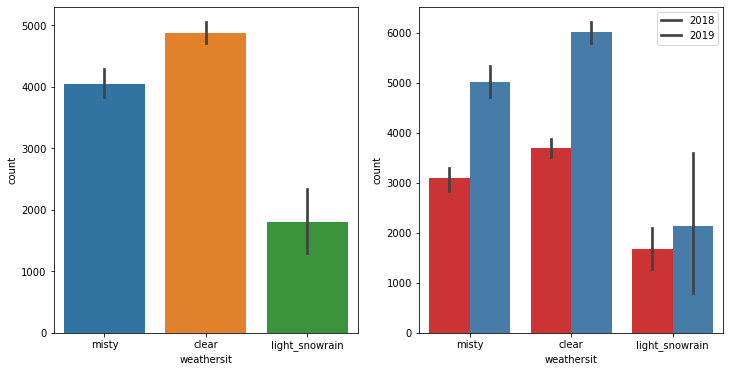

In [38]:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(bike_data_df['weathersit'],'count',data=bike_data_df)
    plt.subplot(1,2,2)
    sns.barplot(bike_data_df['weathersit'],'count',data=bike_data_df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

Inference- Most people will be book the bikes in clear weather than in misty and very less in light snowrain. In high_snowrain no one books.

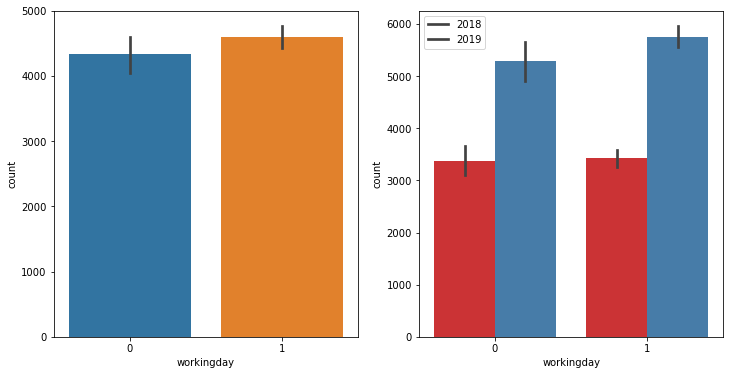

In [39]:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(bike_data_df['workingday'],'count',data=bike_data_df)
    plt.subplot(1,2,2)
    sns.barplot(bike_data_df['workingday'],'count',data=bike_data_df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

Inferenec- People seems to be booking on workingday more rather than weekends

# Data Preperation for linear Regression

In [40]:
months_df=pd.get_dummies(bike_data_df.month,drop_first=True)
weekdays_df=pd.get_dummies(bike_data_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_data_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_data_df.season,drop_first=True)

In [41]:
# Merging  the dataframe, with the dummy variable dataset. 
bike_data_df = pd.concat([bike_data_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [42]:
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   feelingtemp     730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  count           730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  jul             730 non-null    uint8  
 17  jun             730 non-null    uin

In [43]:
# dropping unnecessary columns as we have already created dummy variable out of it.
bike_data_df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [44]:
#Checking the shape of the data
bike_data_df.shape

(730, 30)

Spitting data into train and test 

In [45]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(bike_data_df, train_size = 0.7, random_state = 100)

Scaling continuous variables

In [46]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','feelingtemp','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
# verifying the head after appying scaling.

df_train.head()

year  holiday  workingday      temp  feelingtemp  humidity  windspeed  \
576     1        0           1  0.815169     0.766351  0.725633   0.264686   
426     1        0           0  0.442393     0.438975  0.640189   0.255342   
728     1        0           0  0.245101     0.200348  0.498067   0.663106   
482     1        0           0  0.395666     0.391735  0.504508   0.188475   
111     0        0           1  0.345824     0.318819  0.751824   0.380981   

        count  aug  dec  ...  sat  sun  thu  tue  wed  light_snowrain  misty  \
576  0.827658    0    0  ...    0    0    0    1    0               0      0   
426  0.465255    0    0  ...    1    0    0    0    0               0      1   
728  0.204096    0    1  ...    0    1    0    0    0               0      0   
482  0.482973    0    0  ...    1    0    0    0    0               0      1   
111  0.191095    0    0  ...    0    0    0    0    0               0      1   

     spring  summer  winter  
576       0       0       0  
426       1       0       0  
728       1       0       0  
482       0       1       0  
111       0       1       0  

[5 rows x 30 columns]

In [49]:
# describing the dataset

df_train.describe()

year     holiday  workingday        temp  feelingtemp  \
count  510.000000  510.000000  510.000000  510.000000   510.000000   
mean     0.507843    0.025490    0.676471    0.537440     0.513156   
std      0.500429    0.157763    0.468282    0.225858     0.212410   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    0.339853     0.332086   
50%      1.000000    0.000000    1.000000    0.542596     0.529718   
75%      1.000000    0.000000    1.000000    0.735215     0.688457   
max      1.000000    1.000000    1.000000    1.000000     1.000000   

         humidity   windspeed       count         aug         dec  ...  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  ...   
mean     0.650480    0.320883    0.513499    0.096078    0.084314  ...   
std      0.145846    0.169803    0.224421    0.294988    0.278131  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.538643    0.199179    0.356420    0.000000    0.000000  ...   
50%      0.653714    0.296763    0.518638    0.000000    0.000000  ...   
75%      0.754830    0.414447    0.684710    0.000000    0.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

              sat         sun         thu         tue         wed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.154902    0.143137    0.133333    0.131373    0.158824   
std      0.362166    0.350557    0.340268    0.338139    0.365870   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       light_snowrain       misty      spring      summer      winter  
count      510.000000  510.000000  510.000000  510.000000  510.000000  
mean         0.029412    0.345098    0.243137    0.247059    0.247059  
std          0.169124    0.475867    0.429398    0.431725    0.431725  
min          0.000000    0.000000    0.000000    0.000000    0.000000  
25%          0.000000    0.000000    0.000000    0.000000    0.000000  
50%          0.000000    0.000000    0.000000    0.000000    0.000000  
75%          0.000000    1.000000    0.000000    0.000000    0.000000  
max          1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

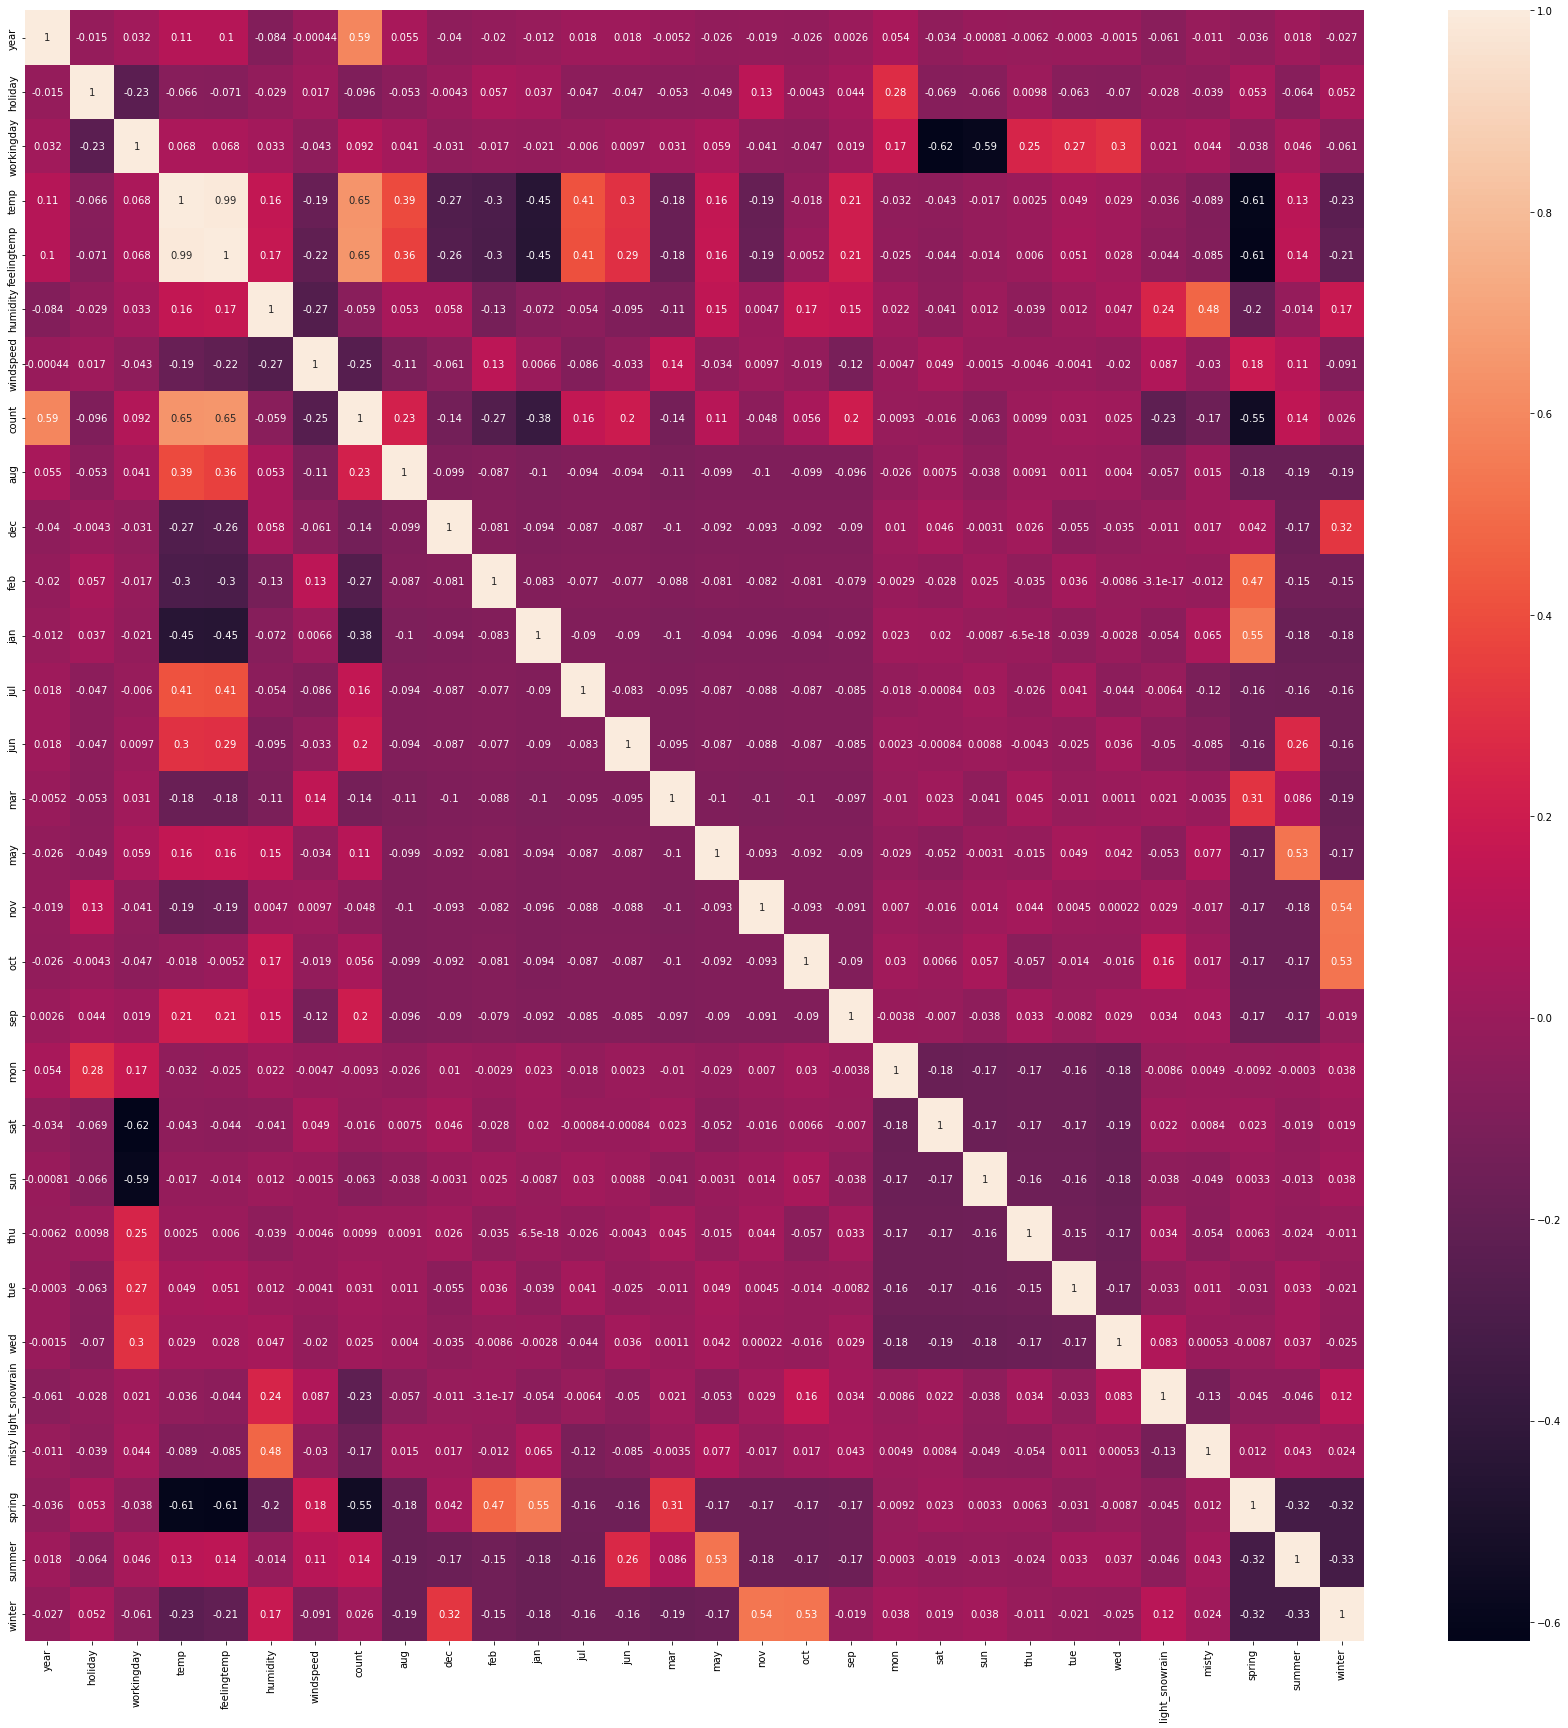

In [50]:
#Checking if the variables are highly correlated
plt.figure(figsize = (30, 30))  
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [51]:
# Building the Linear Model

y_train = df_train.pop('count')
X_train = df_train

Feature selection using recurrsive feature eliminatin(RFE)

In [52]:
# Recursive feature elimination 

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [53]:
# Selecting 15 features by automated approach
rfe=RFE(lr,15)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [54]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('feelingtemp', False, 9),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 14),
 ('dec', False, 2),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', False, 12),
 ('jun', False, 13),
 ('mar', False, 15),
 ('may', False, 5),
 ('nov', False, 3),
 ('oct', False, 7),
 ('sep', True, 1),
 ('mon', False, 6),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 8),
 ('wed', False, 11),
 ('light_snowrain', True, 1),
 ('misty', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1)]

In [55]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'feb',
       'jan', 'sep', 'sat', 'sun', 'light_snowrain', 'misty', 'summer',
       'winter'],
      dtype='object')


In [56]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['feelingtemp', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed', 'spring'],
      dtype='object')

In [57]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [58]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [59]:
# calculate VIF

calculateVIF(X_train_rfe)

Features    VIF
2       workingday  38.42
9              sat   9.31
10             sun   9.17
1          holiday   2.45
3             temp   2.23
7              jan   1.93
4         humidity   1.88
14          winter   1.88
12           misty   1.56
6              feb   1.54
13          summer   1.46
11  light_snowrain   1.24
5        windspeed   1.19
8              sep   1.13
0             year   1.03

humidity shows high VIF value.

# Building model using statsmodel, for the detailed statistics

In [60]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.8
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          5.09e-190
Time:                        22:47:31   Log-Likelihood:                 514.32
No. Observations:                 510   AIC:                            -998.6
Df Residuals:                     495   BIC:                            -935.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1803      0.024      7.

In [61]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
3         humidity  21.52
2             temp  11.84
4        windspeed   3.92
13          winter   2.27
11           misty   2.19
0             year   2.06
12          summer   1.87
6              jan   1.76
5              feb   1.45
7              sep   1.23
8              sat   1.23
9              sun   1.23
10  light_snowrain   1.21
1          holiday   1.06

In [62]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.8
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          5.09e-190
Time:                        22:47:31   Log-Likelihood:                 514.32
No. Observations:                 510   AIC:                            -998.6
Df Residuals:                     495   BIC:                            -935.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2593      0.030      8.

In [63]:
# We can drop humidity variable as it has high VIF
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
2             temp  3.96
3        windspeed  3.84
0             year  2.06
11          summer  1.71
10           misty  1.55
12          winter  1.52
5              jan  1.27
4              feb  1.24
7              sat  1.22
6              sep  1.21
8              sun  1.21
9   light_snowrain  1.08
1          holiday  1.06

VIF looks in range now 

In [64]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.6
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.78e-187
Time:                        22:47:31   Log-Likelihood:                 505.49
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     496   BIC:                            -923.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1753      0.022      7.

In [65]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
2             temp  3.91
3        windspeed  3.79
0             year  2.05
10          summer  1.71
9            misty  1.55
11          winter  1.51
5              jan  1.27
4              feb  1.24
6              sep  1.21
7              sun  1.18
8   light_snowrain  1.08
1          holiday  1.05

In [66]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.2
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.85e-188
Time:                        22:47:31   Log-Likelihood:                 505.03
No. Observations:                 510   AIC:                            -984.1
Df Residuals:                     497   BIC:                            -929.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1777      0.022      7.

In [67]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
2             temp  3.91
3        windspeed  3.79
0             year  2.05
10          summer  1.71
9            misty  1.55
11          winter  1.51
5              jan  1.27
4              feb  1.24
6              sep  1.21
7              sun  1.18
8   light_snowrain  1.08
1          holiday  1.05

Now all the p_values are less than 0.05 and VIF values are less than 5.
We can cosider the above model i.e lr_4, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 207.4 (which is greater than 1) and the Prob (F-statistic) of 6.68e-185 i.e almost equals to zero, states that the overall model is significant

# Residual Analysis of the train data


So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [68]:
X_train_lm_4

const  year  holiday      temp  windspeed  feb  jan  sep  sun  \
576    1.0     1        0  0.815169   0.264686    0    0    0    0   
426    1.0     1        0  0.442393   0.255342    0    0    0    0   
728    1.0     1        0  0.245101   0.663106    0    0    0    1   
482    1.0     1        0  0.395666   0.188475    0    0    0    0   
111    1.0     0        0  0.345824   0.380981    0    0    0    0   
..     ...   ...      ...       ...        ...  ...  ...  ...  ...   
578    1.0     1        0  0.863973   0.187140    0    0    0    0   
53     1.0     0        0  0.202618   0.111379    1    0    0    0   
350    1.0     0        0  0.248216   0.431816    0    0    0    0   
79     1.0     0        0  0.462664   0.529881    0    0    0    0   
520    1.0     1        0  0.600225   0.359599    0    0    0    0   

     light_snowrain  misty  summer  winter  
576               0      0       0       0  
426               0      1       0       0  
728               0      0       0       0  
482               0      1       1       0  
111               0      1       1       0  
..              ...    ...     ...     ...  
578               0      0       0       0  
53                0      0       0       0  
350               0      1       0       1  
79                0      1       1       0  
520               0      1       1       0  

[510 rows x 13 columns]

In [69]:
y_train_pred = lr_4.predict(X_train_lm_4)

Normality of error terms

Text(0.5, 0, 'Errors')

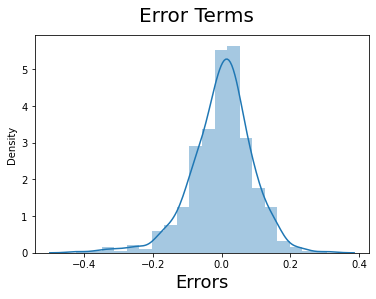

In [70]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

Multi Colinearity

In [71]:
calculateVIF(X_train_new)

Features   VIF
2             temp  3.91
3        windspeed  3.79
0             year  2.05
10          summer  1.71
9            misty  1.55
11          winter  1.51
5              jan  1.27
4              feb  1.24
6              sep  1.21
7              sun  1.18
8   light_snowrain  1.08
1          holiday  1.05

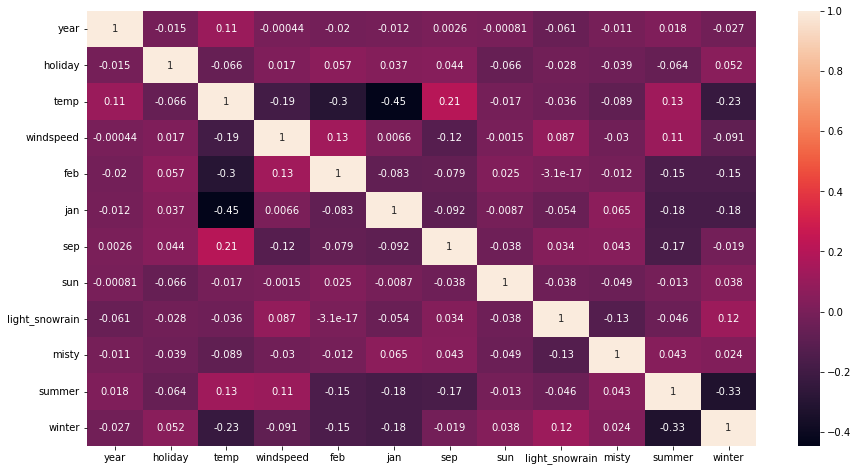

In [72]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

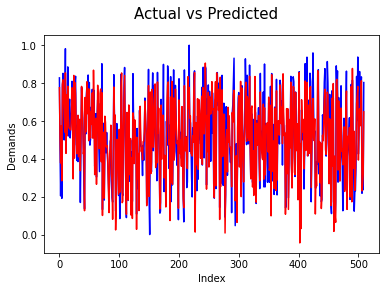

In [73]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Making Prediction

R-Squared value for train predictions

In [74]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.839259212274726

Prediction of values on test dataset

In [75]:
# Applying scaling on the test dataset

num_vars = ['temp', 'feelingtemp', 'humidity', 'windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

year  holiday  workingday      temp  feelingtemp  humidity  windspeed  \
184     0        1           0  0.831783     0.769660  0.657364   0.084219   
535     1        0           1  0.901354     0.842587  0.610133   0.153728   
299     0        0           1  0.511964     0.496145  0.837699   0.334206   
221     0        0           1  0.881625     0.795343  0.437098   0.339570   
152     0        0           1  0.817246     0.741471  0.314298   0.537414   

        count  aug  dec  ...  sat  sun  thu  tue  wed  light_snowrain  misty  \
184  0.692706    0    0  ...    0    0    0    0    0               0      1   
535  0.712034    0    0  ...    0    0    0    0    1               0      0   
299  0.303382    0    0  ...    0    0    1    0    0               0      1   
221  0.547400    1    0  ...    0    0    0    0    1               0      0   
152  0.569029    0    0  ...    0    0    1    0    0               0      0   

     spring  summer  winter  
184       0       0       0  
535       0       1       0  
299       0       0       1  
221       0       0       0  
152       0       1       0  

[5 rows x 30 columns]

In [76]:
df_test.describe()

year     holiday  workingday        temp  feelingtemp  \
count  220.000000  220.000000  220.000000  220.000000   220.000000   
mean     0.481818    0.036364    0.700000    0.558718     0.532847   
std      0.500809    0.187620    0.459303    0.233187     0.217401   
min      0.000000    0.000000    0.000000    0.046591     0.025950   
25%      0.000000    0.000000    0.000000    0.355429     0.344870   
50%      0.000000    0.000000    1.000000    0.558172     0.544652   
75%      1.000000    0.000000    1.000000    0.755981     0.713308   
max      1.000000    1.000000    1.000000    0.984424     0.980934   

         humidity   windspeed       count         aug         dec  ...  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  ...   
mean     0.638221    0.313293    0.522154    0.059091    0.086364  ...   
std      0.148694    0.159584    0.219163    0.236333    0.281541  ...   
min      0.261915   -0.042808    0.048205    0.000000    0.000000  ...   
25%      0.529197    0.198843    0.378595    0.000000    0.000000  ...   
50%      0.625590    0.300126    0.524678    0.000000    0.000000  ...   
75%      0.743798    0.402718    0.677750    0.000000    0.000000  ...   
max      1.002146    0.807474    0.963300    1.000000    1.000000  ...   

              sat         sun         thu         tue         wed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.118182    0.145455    0.163636    0.168182    0.100000   
std      0.323559    0.353363    0.370789    0.374881    0.300684   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       light_snowrain       misty      spring      summer      winter  
count      220.000000  220.000000  220.000000  220.000000  220.000000  
mean         0.027273    0.318182    0.254545    0.263636    0.236364  
std          0.163248    0.466833    0.436599    0.441609    0.425817  
min          0.000000    0.000000    0.000000    0.000000    0.000000  
25%          0.000000    0.000000    0.000000    0.000000    0.000000  
50%          0.000000    0.000000    0.000000    0.000000    0.000000  
75%          0.000000    1.000000    1.000000    1.000000    0.000000  
max          1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [77]:
y_test = df_test.pop('count')
X_test = df_test

In [78]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [79]:
y_pred = lr_4.predict(X_test_lm_4)

In [80]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7966

# Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

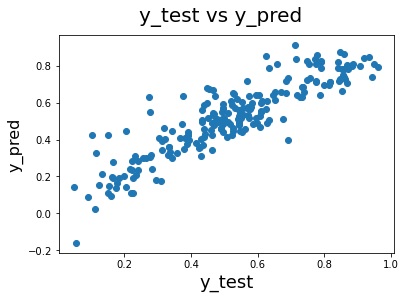

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [82]:
round(lr_4.params,4)

const             0.1777
year              0.2342
holiday          -0.1035
temp              0.4981
windspeed        -0.1603
feb              -0.0303
jan              -0.0590
sep               0.0951
sun              -0.0495
light_snowrain   -0.2901
misty            -0.0796
summer            0.0746
winter            0.1109
dtype: float64

We can see that the equation of our best fitted line is:

count=0.17770.2342 * year - 0.1035 * holiday + 0.4981 * temp -0.1603 * windspeed -0.0303 * feb -0.0590 * jan + 0.0951 * sep
-0.0495 * sun -0.2901 * light_snowrain -0.0796 * misty + 0.0746 * summer + 0.1109 * winter

In [83]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7848


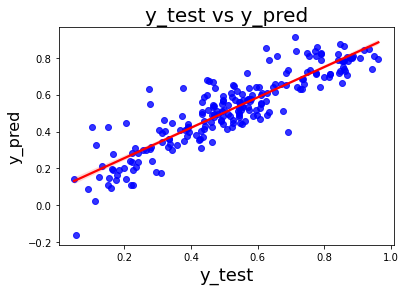

In [84]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.839
- Test dataset R^2           : 0.7966
- Train dataset Adjusted R^2 : 0.835    
- Test dataset Adjusted R^2  : 0.7848
Demand of bikes depend on year, holiday, temp, windspeed,sep,feb,jan,sun,Light_snowrain, Misty, spring, summer and winter.